$$ \bf{EE0404\ SIGNAL\ PROCESSING\ APPLICATIONS} $$
$$ \ $$
$$ $$
$$ \text{Lecture 2} $$

$$ \text{Discrete Fourier Transform - PART 1}
 $$

$$ \text{ By: Güray GÜRKAN, PhD} $$

$$ \text{Aug 2016} $$

# Discrete Fourier Transform
- Euler's Formula
- Basis functions of Discrete Fourier Transform
- Mutual projections and orthonormality inspection.



# Euler's formula

This formula is very important since it combines two orthogonal trigonometric functions.

$$ e^{j\phi} = cos(\phi) + jsin(\phi)$$

This formula directly describes a point with norm = 1 and argument= $\phi$ in complex plane.

In terms of time series, it can also have the form 

$$ e^{j\omega t} = cos(\omega t ) + jsin(\omega t)$$

where $\phi$ is a function of time.

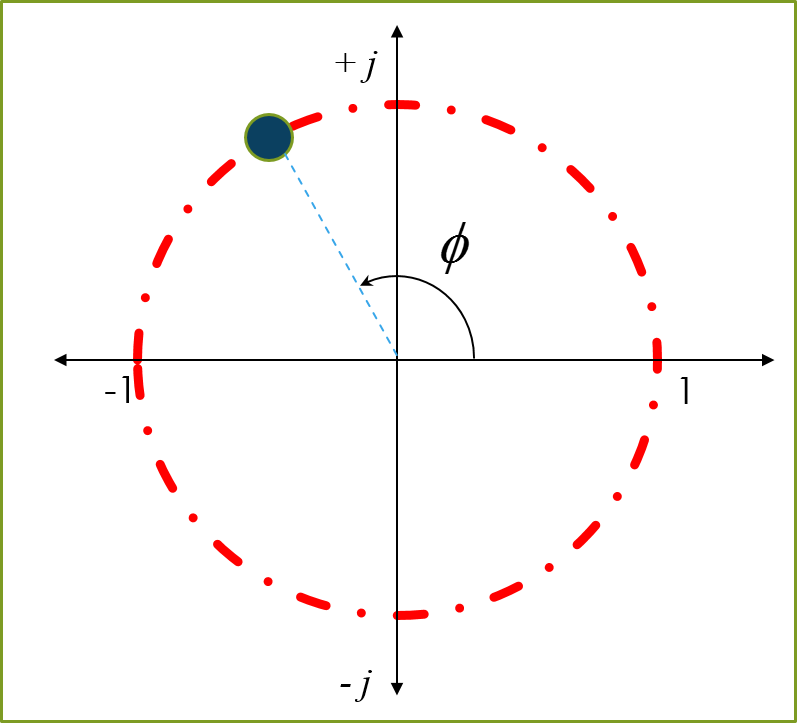

In [3]:
from IPython.display import Image
Image('.\Figs\EE0404_Lecture2_fig1.png',width=400)

# Question
Generate and plot cosine and sine functions that are sampled at fs=60 Hz and have a real frequency 3 Hz.

- Are there any missing parameters? 
- Duration? Let’s pick it as 60 samples (almost 1 second?).



Populating the interactive namespace from numpy and matplotlib


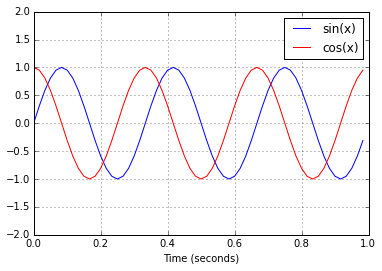

In [5]:
%pylab inline
fs = 60.0
n = arange(fs)
fr = 3.0
t = n/fs

euler = exp(1j*2*pi*fr*t) 

p1 = plot(t,imag(euler));
hold(True);
p2 = plot(t,real(euler),'r');
grid(True);
ylim([-2,2]);
xlabel('Time (seconds)');
legend(('sin(x)','cos(x)'));


# Oh dear, DFT!

$$ y(k) = \sum\limits_{n=0}^{M-1} x(n)\left(e^{\ j \tfrac{2\pi}{M}nk}\right)^*,\ \ \ k=\{0,1,...,M-1\} $$

$$ y(k) = \sum\limits_{n=0}^{M-1} x(n)e^{-j \tfrac{2\pi}{M}nk},\ \ \ k=\{0,1,...,M-1\}$$

$$ y(k) = \sum\limits_{n=0}^{M-1} x(n)\left[(\cos\left(e^{\ j \tfrac{2\pi}{M}nk}\right)-j\sin\left(e^{\ j \tfrac{2\pi}{M}nk}\right)\right] $$

$$ y(k) = \sum\limits_{n=0}^{M-1} x(n)\cos\left(e^{\ j \tfrac{2\pi}{M}nk}\right) - j\sum\limits_{n=0}^{M-1} x(n)\sin\left(e^{\ j \tfrac{2\pi}{M}nk}\right) $$

# DFT :  k=0?

$$ y(k) = \sum\limits_{n=0}^{M-1} x(n)e^{-j \tfrac{2\pi}{M}nk},\ \ \ k=\{0,1,...,M-1\} $$

$$ y(0) = \sum\limits_{n=0}^{M-1} x(n) $$

- The first element (k=0) of DFT is the algebraic sum of the transformed signal values
- If this value is divided by the length of the signal, it gives the average value of the signal.



# DFT : k=m?

$$ y(k) = \sum\limits_{n=0}^{M-1} x(n)\cos\left(e^{\ j \tfrac{2\pi}{M}nk}\right) - j\sum\limits_{n=0}^{M-1} x(n)\sin\left(e^{\ j \tfrac{2\pi}{M}nk}\right) $$

- DFT bin for k = m is the algebraic sum of the transformed signal $x(n)$ multiplied by cosine and sin. signals with angular frequency:

$$ \Omega = \dfrac{2\pi}{M}.m $$


# DFT : Basis Functions?

As mentioned earlier, we have

$$ \Omega_k = \dfrac{2\pi}{M}.k $$

and thus the multipliers are

$$ \begin{align}
u_k(n) &= e^{\ j\Omega_kn} \\
       &= \cos(j\Omega_kn) + j\sin(j\Omega_kn) \end{align} $$

- DFT, indeed, is the projection of $x(n)$ to sine and cosine signals.

- They constitute the basis functions of Fourier Space

$$ y(k) = \sum\limits_{n=0}^{M-1} x(n)u_k^*(n),\ \ \ k=\{0,1,...,M-1\} $$

# Properties of basis functions

- Norms of basis functions are 1 (orthonormality).
- Recall that in cartesian coordinates x-y-z, the basis functions have no mutual projections.
- In mathematical terms, their inner product is 0.

$$ \begin{array}{llll} a_1=[1 & 0 & 0]&\qquad a_xa_y^T=0\\ a_2=[0 & 1 & 0]&\qquad a_xa_z^T=0 \\ a_3=[0 & 0 & 1]&\qquad a_xa_z^T=0  \end{array} $$

- Every vector in x-y-z ($R^3$) can be written as linear combination of these vectors.


** Projection of $a_1$ on $ a_2$ **

In [7]:
a1 = [1, 0, 0]
a2 = [0, 1, 0]

pr1 = dot(a1,a2)

#or 

pr1_=sum(a1*conjugate(a2))

print 'Projection values are ', pr1 ,' and ', pr1_

Projection values are  0  and  0


 # Fourier basis functions
 
- Norms of basis functions are 1?

 - YES
 
- So: their inner product is 0?

 - YES, soon
 
- Any signal can be written as linear combinations of these vectors?


# Example 1

400 point DFT is desired to be calculated for a signal.

1.) What are the basis functions for bins $k$=4 and $k$=8?

2.) What are the real frequencies corresponding to above bins?

3.) What are the inner products of the basis function $k$=4 with itself and $k$=5?

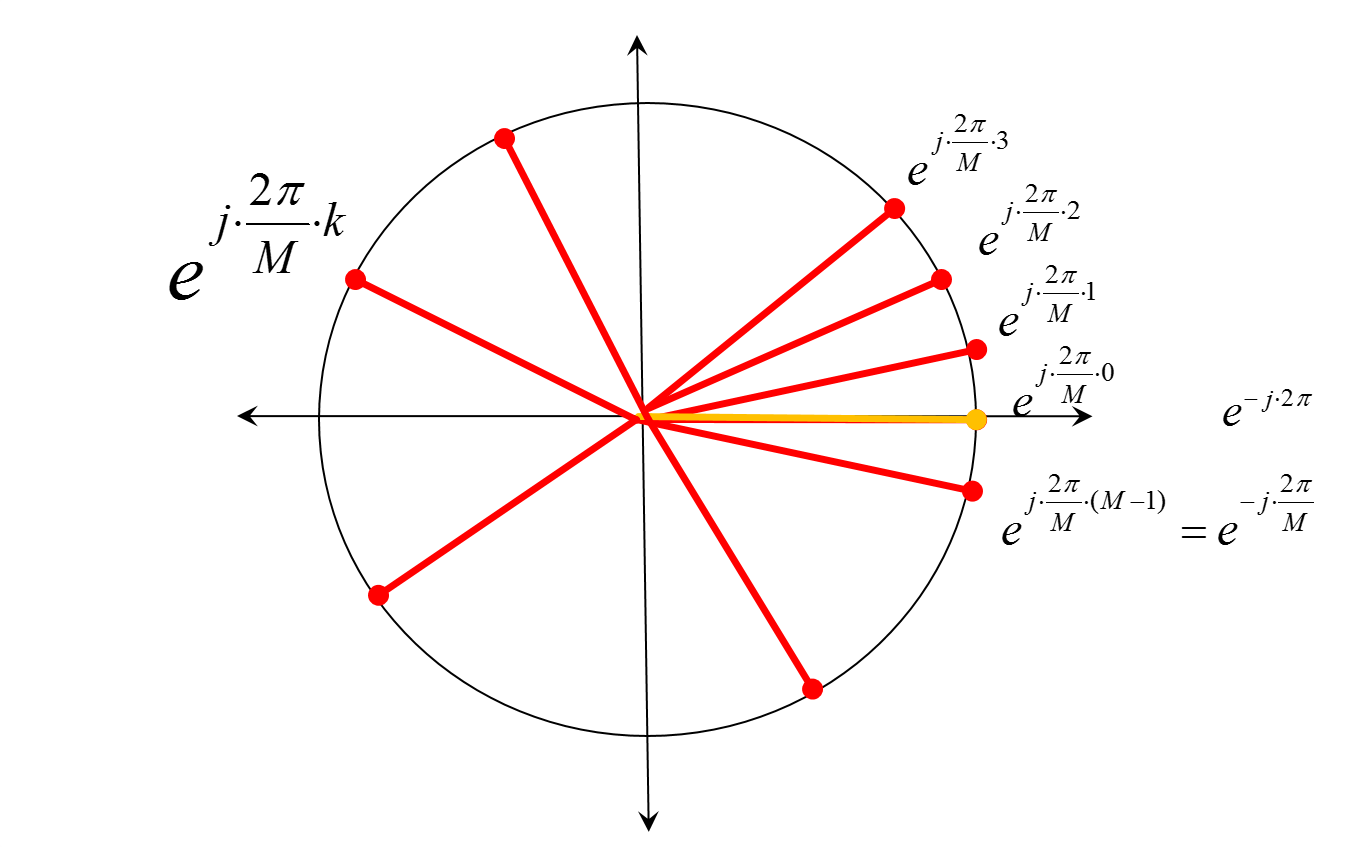

In [11]:
Image('.\Figs\EE0404_Lecture2_fig2.png',width=600)

** Solution **

1.) We know that 

$$ u_k(n) = e^{j\Omega_k n} $$

So we have

$$ u_4(n) = e^{j\frac{2\pi 4}{400} n} \text{  and  } u_8(n) = e^{j\frac{2\pi 8}{400} n} $$

2.) To find the real frequencies, we should be given the sampling frequency. Consider  $f_S$=100 Hz.
The normalized angular frequency of a sampled cosine is:

$$\Omega_N = \frac{2\pi f_r}{f_s} $$

where $f_r$ is the frequency of the cosine (in Hz) and $f_s$ is the sampling frequency. Thus we can write

$$ \Omega_k = \frac{2\pi k}{M} =  \frac{2\pi f_r}{f_s} $$

yielding 

$$ \frac{k}{M} = \frac{f_r}{f_s} \to f_r = k \frac {f_s}{M} $$


Thus for real frequency of $u_4(n)$ we have 1 Hz and for $u_8(n)$ we have 2 Hz.


$$ u_8(n)=e^{\ j\tfrac{2\pi.8}{400}n}=e^{\ j\tfrac{2\pi.f_r}{f_s}n} $$

3.) For the inner product calculations, we gonna generate and plot the basis functions first.

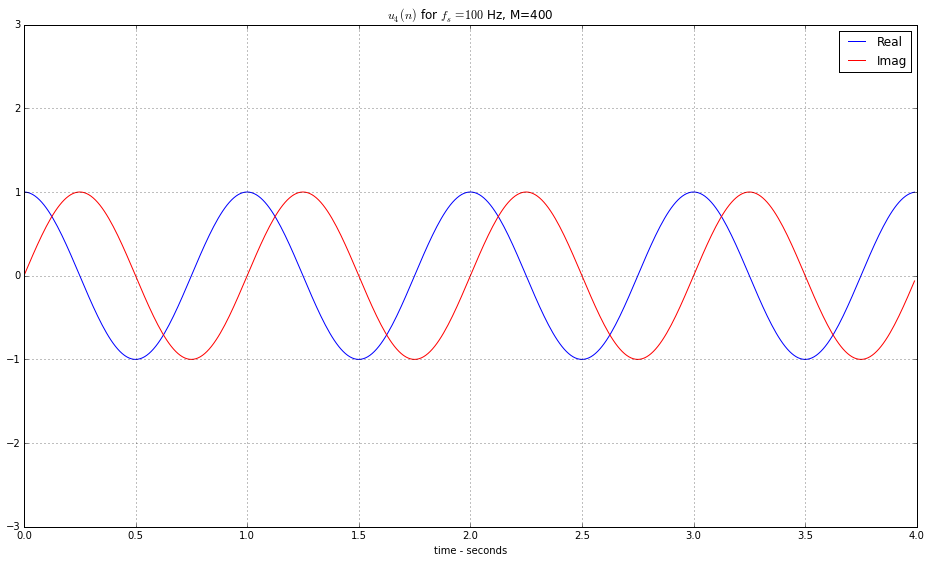

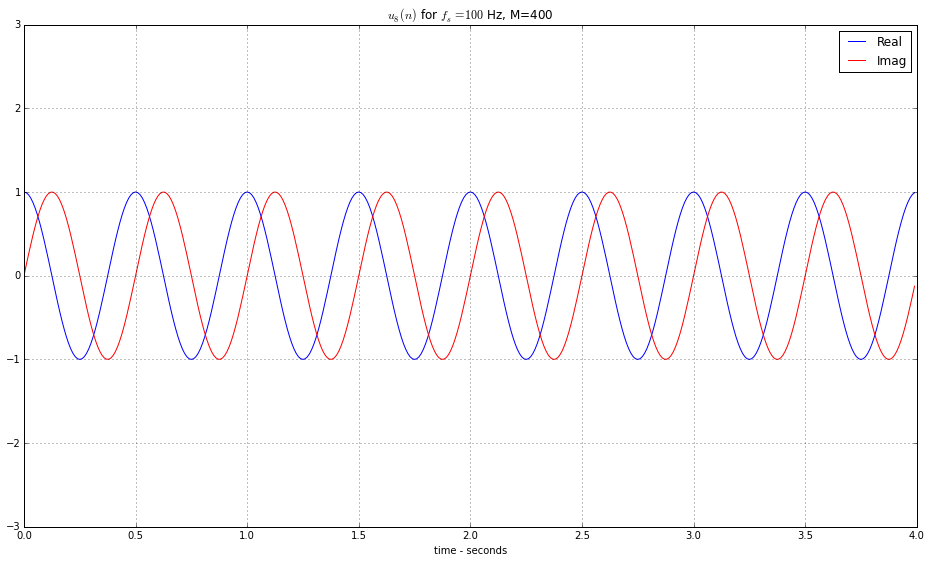

In [14]:
M = 400.0
n = arange(M);
u4 = exp(1j*2*pi*4*n/M)
u8 = exp(1j*2*pi*8*n/M)
plot(n/100.0, real(u4));
hold(True);
grid(True);
plot(n/100.0, imag(u4),'r');
ylim([-3,3])
legend(('Real','Imag'));
xlabel('time - seconds');
title('$ u_4(n) $ for $ f_s=100$ Hz, M=400')
figure();
plot(n/100, real(u8));
hold(True);
grid(True);
plot(n/100,imag(u8),'r');
title('$u_8(n)$ for $f_s=100$ Hz, M=400');
ylim([-3,3]); xlabel('time - seconds');
legend(('Real','Imag'));

** *Inner product calculation* **

In [19]:

u4=exp(1j*2*pi*4*n/M)
u5=exp(1j*2*pi*5*n/M)

print "Self Projection of u4(n) is ", sum(u4*conjugate(u4))/M
print "Projection of u4(n) on u5(n) is ", sum(u4*conjugate(u5))/M

Self Projection of u4(n) is  (1+0j)
Projection of u4(n) on u5(n) is  (1.7763568394e-17-7.1054273576e-17j)


**As a result, we can state that Fourier Basis Functions are orthogonal and form an orthonormal basis in complex domain.**